In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('GT2_FINAL.csv')

In [4]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,apex,fqdns,firstseen-pdns,lastseen-pdns,days count-pdns,query count,name servers,ns domain,...,Number_of_query_parameters,Positive_count,Response_code,URL_after_redirects,resolution,rlength,url_length,number of days between firstseen and lastseen,Label,Alexa rank (avg)
0,0,0,warnafb07.ga,warnafb07.ga,2018-10-31,2019-10-10,14,2,1,True,...,0,5,None,False,195.20.55.163,None,21.0,0,AC,-1.0
1,1,1,quartellanthonyessexcountyobgyn.com,quartellanthonyessexcountyobgyn.com,2019-06-09,2020-01-18,618,1,1,True,...,0,12,200,False,192.154.26.34,16586,58.0,28,COMP,-1.0
2,2,2,linkedinfreebies.ml,linkedinfreebies.ml,2019-09-27,2019-09-29,15,1,1,True,...,1,12,200,False,165.227.229.82,15081,80.0,2,AC,-1.0
3,3,3,aipaiwang.com,aipaiwang.com,2014-11-07,2020-01-17,2026,4,3,True,...,0,17,200,True,118.178.192.107,21274,38.0,9,COMP,-1.0
4,4,4,therfwrwdd0.org,therfwrwdd0.org,2019-09-09,2019-09-15,82,1,1,True,...,0,9,500,False,23.94.113.115,7309,35.0,21,COMP,-1.0


In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'apex', 'fqdns', 'firstseen-pdns',
       'lastseen-pdns', 'days count-pdns', 'query count', 'name servers',
       'ns domain', 'soa_domains_nos', 'soa_domain', 'suspicious_tld',
       'length', 'entropy', 'fake_tld', 'brand', 'pop_keywords', 'similar',
       'is_idn', 'minus', 'num_subdomains', 'Number_of_total_Scans',
       'Number_of_Benign_Scans', 'apex_marked_malicious',
       'domain_marked_malicious', 'sibling_domain_marked_malicious',
       'Number_of_query_parameters', 'Positive_count', 'Response_code',
       'URL_after_redirects', 'resolution', 'rlength', 'url_length',
       'number of days between firstseen and lastseen', 'Label',
       'Alexa rank (avg)'],
      dtype='object')

In [6]:
df = df[[ 'apex', 'fqdns', 'firstseen-pdns', 'lastseen-pdns',
       'days count-pdns', 'query count', 'name servers', 'ns domain',
       'soa_domains_nos', 'soa_domain', 'suspicious_tld', 'length', 'entropy',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'minus',
       'num_subdomains', 'Label', 'Number_of_total_Scans',
       'Number_of_Benign_Scans', 'apex_marked_malicious',
       'domain_marked_malicious', 'sibling_domain_marked_malicious',
       'Number_of_query_parameters', 'Positive_count', 'Response_code',
       'URL_after_redirects', 'resolution', 'rlength', 'url_length',
       'number of days between firstseen and lastseen','Alexa rank (avg)']]

In [7]:
data = []
for index, row in df.iterrows():
    try:
        row.rlength = float(row.rlength)
        data.append(row)
    except:
        row.rlength = -1
        data.append(row)
    try:
        row.url_length  = float(row.url_length)
    except:
        row.url_length  = float(len(row.fqdns))
data = pd.DataFrame(data)        

In [8]:
data.dtypes

apex                                              object
fqdns                                             object
firstseen-pdns                                    object
lastseen-pdns                                     object
days count-pdns                                    int64
query count                                        int64
name servers                                       int64
ns domain                                         object
soa_domains_nos                                    int64
soa_domain                                        object
suspicious_tld                                    object
length                                             int64
entropy                                          float64
fake_tld                                           int64
brand                                              int64
pop_keywords                                       int64
similar                                            int64
minus                          

In [9]:
data.head(1).Label

0    AC
Name: Label, dtype: object

In [10]:
data.tail(1).Label

1417    COMP
Name: Label, dtype: object

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['suspicious_tld'] = label_encoder.fit_transform(data['suspicious_tld'])
data['Label'] = label_encoder.fit_transform(data['Label'])
data['ns domain'] = label_encoder.fit_transform(data['ns domain'])
data['soa_domain'] = label_encoder.fit_transform(data['soa_domain'])


data['Response_code'] = label_encoder.fit_transform(data['Response_code'])
data['URL_after_redirects'] = label_encoder.fit_transform(data['URL_after_redirects'])

In [12]:
data['days count-pdns'] = data['days count-pdns']/( data['days count-pdns'].max()-data['days count-pdns'].min())
data['number of days between firstseen and lastseen'] = data['number of days between firstseen and lastseen']/(data['number of days between firstseen and lastseen'].max()-data['number of days between firstseen and lastseen'].min())

In [13]:
data.head(5)

,apex,fqdns,firstseen-pdns,lastseen-pdns,days count-pdns,query count,name servers,ns domain,soa_domains_nos,soa_domain,...,sibling_domain_marked_malicious,Number_of_query_parameters,Positive_count,Response_code,URL_after_redirects,resolution,rlength,url_length,number of days between firstseen and lastseen,Alexa rank (avg)
0,warnafb07.ga,warnafb07.ga,2018-10-31,2019-10-10,1.367473e-07,2,1,1,0,0,...,0.0,0,5,19,0,195.20.55.163,-1.0,21.0,0.000000,-1.0
1,quartellanthonyessexcountyobgyn.com,quartellanthonyessexcountyobgyn.com,2019-06-09,2020-01-18,6.036418e-06,1,1,1,1,1,...,0.0,0,12,0,0,192.154.26.34,16586.0,58.0,0.010245,-1.0
2,linkedinfreebies.ml,linkedinfreebies.ml,2019-09-27,2019-09-29,1.465150e-07,1,1,1,1,1,...,0.0,1,12,0,0,165.227.229.82,15081.0,80.0,0.000732,-1.0
3,aipaiwang.com,aipaiwang.com,2014-11-07,2020-01-17,1.978929e-05,4,3,1,2,0,...,158.0,0,17,0,1,118.178.192.107,21274.0,38.0,0.003293,-1.0
4,therfwrwdd0.org,therfwrwdd0.org,2019-09-09,2019-09-15,8.009487e-07,1,1,1,1,0,...,0.0,0,9,12,0,23.94.113.115,7309.0,35.0,0.007684,-1.0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data[[
       'days count-pdns', 'query count', 'name servers', 'ns domain',
       'soa_domains_nos', 'soa_domain', 'suspicious_tld', 'length', 'entropy',
       'fake_tld', 'brand', 'pop_keywords', 'similar',  'minus',
       'num_subdomains', 'Number_of_total_Scans',
       'Number_of_Benign_Scans', 'apex_marked_malicious',
       'domain_marked_malicious', 'sibling_domain_marked_malicious',
       'Number_of_query_parameters', 'Positive_count', 'Response_code',
       'URL_after_redirects', 'rlength', 'url_length',
       'number of days between firstseen and lastseen']
], data.Label, test_size = 0.20, random_state = 0)

In [15]:
data.head(1).Label

0    0
Name: Label, dtype: int64

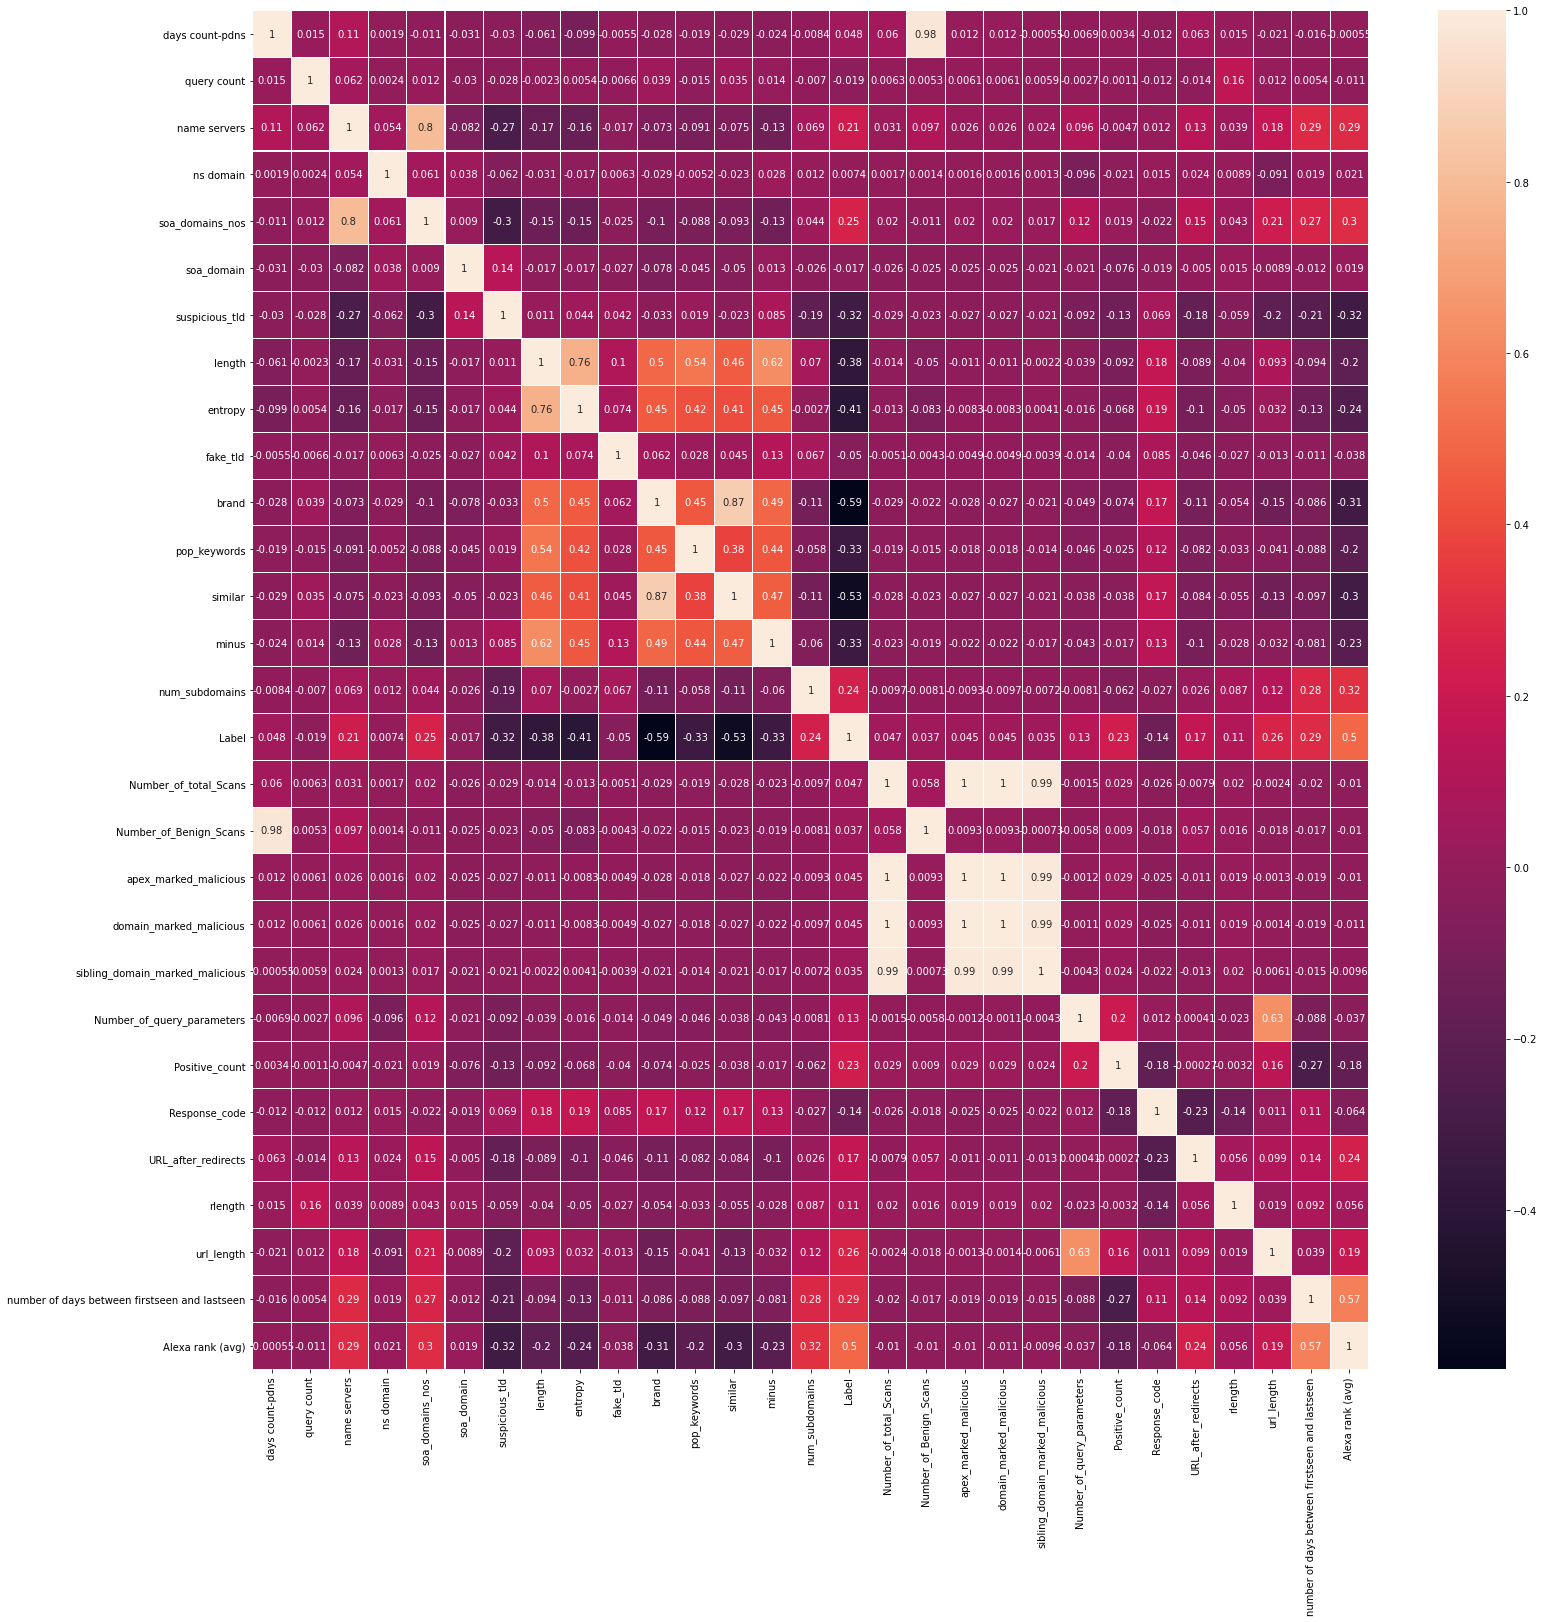

In [16]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), annot = True ,linewidths=.05)
plt.savefig('attacker_created_compromised_corr_gt1.png')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data[[
       'days count-pdns', 'query count', 'name servers', 'ns domain',
       'soa_domains_nos', 'soa_domain', 'suspicious_tld', 'length', 'entropy',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'minus',
       'num_subdomains', 'Number_of_total_Scans',
       'Number_of_Benign_Scans', 'apex_marked_malicious',
       'domain_marked_malicious', 'sibling_domain_marked_malicious',
       'Number_of_query_parameters', 'Positive_count', 'Response_code',
       'URL_after_redirects', 'rlength', 'url_length',
       'number of days between firstseen and lastseen','Alexa rank (avg)']
], data.Label, test_size = 0.20, random_state = 0)

In [18]:
X_trainLR1, X_testLR1, Y_trainLR1, Y_testLR1 = train_test_split(data[['Alexa rank (avg)']
], data.Label, test_size = 0.20, random_state = 0)

from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model1.fit(X_trainLR1,Y_trainLR1)
predictionsLR1 = model1.predict(X_testLR1)
print('GT 2 LogisticRegression - Only Alexa',accuracy_score(Y_testLR1,predictionsLR1),' precision : ',precision_score(Y_testLR1,predictionsLR1),' recall : ',recall_score(Y_testLR1,predictionsLR1))


X_trainLR2, X_testLR2, Y_trainLR2, Y_testLR2 = train_test_split(data[['days count-pdns']
], data.Label, test_size = 0.20, random_state = 0)


model2=LogisticRegression()
model2.fit(X_trainLR2,Y_trainLR2)
predictionsLR2 = model2.predict(X_testLR2)
print('GT 2 LogisticRegression - Only PDNS',accuracy_score(Y_testLR2,predictionsLR2),' precision : ',precision_score(Y_testLR2,predictionsLR2),' recall : ',recall_score(Y_testLR2,predictionsLR2))

X_trainLR3, X_testLR3, Y_trainLR3, Y_testLR3 = train_test_split(data[['Alexa rank (avg)', 'days count-pdns']
], data.Label, test_size = 0.20, random_state = 0)


model3=LogisticRegression()
model3.fit(X_trainLR3,Y_trainLR3)
predictionsLR3 = model3.predict(X_testLR3)
print('GT 2 LogisticRegression - Both PDNS & Alexa',accuracy_score(Y_testLR3,predictionsLR3),' precision : ',precision_score(Y_testLR3,predictionsLR3),' recall : ',recall_score(Y_testLR3,predictionsLR3))

GT 2 LogisticRegression - Only Alexa 0.7535211267605634  precision :  0.9333333333333333  recall :  0.45901639344262296
GT 2 LogisticRegression - Only PDNS 0.5704225352112676  precision :  0.0  recall :  0.0
GT 2 LogisticRegression - Both PDNS & Alexa 0.7535211267605634  precision :  0.9333333333333333  recall :  0.45901639344262296


In [19]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['RandomForestClassifier : ',RandomForestClassifier()],      
      ]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(Y_test,predictions))
    print(name,accuracy_score(Y_test,predictions),' precision : ',precision_score(Y_test,predictions),' recall : ',recall_score(Y_test,predictions))

Logistic Regression : 0.8697183098591549  precision :  0.9381443298969072  recall :  0.7459016393442623
Decision Tree Classification : 0.9788732394366197  precision :  0.9833333333333333  recall :  0.9672131147540983
Gradient Boosting Classification : 0.971830985915493  precision :  0.9913793103448276  recall :  0.9426229508196722
Ada Boosting Classification : 0.9683098591549296  precision :  0.9829059829059829  recall :  0.9426229508196722
Extra Tree Classification : 0.9612676056338029  precision :  0.9743589743589743  recall :  0.9344262295081968
K-Neighbors Classification : 0.852112676056338  precision :  0.8333333333333334  recall :  0.819672131147541
Support Vector Classification : 0.7429577464788732  precision :  0.9298245614035088  recall :  0.4344262295081967
RandomForestClassifier :  0.971830985915493  precision :  0.9913793103448276  recall :  0.9426229508196722


In [20]:
RFC = RandomForestClassifier()

In [21]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1,1001,100))
max_depth = list(range(1,1001,100))

hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators)
h_rfmodel = GridSearchCV(RFC, hyperparameters, cv=5,n_jobs=100, verbose=1)

best_logmodel=h_rfmodel.fit(X_train,Y_train)

print('Best Estimators:', best_logmodel.best_estimator_.get_params()['n_estimators'])
print('Best Max Depth:', best_logmodel.best_estimator_.get_params()['max_depth'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=100)]: Using backend LokyBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:  1.0min


Best Estimators: 101
Best Max Depth: 201


[Parallel(n_jobs=100)]: Done 500 out of 500 | elapsed:  1.7min finished


In [22]:
RFC = RandomForestClassifier(max_depth=701, n_estimators=201)
RFC.fit(X_train,Y_train)
predictions_RFC = RFC.predict(X_test)

In [23]:
print('Random Forest',accuracy_score(Y_test,predictions_RFC),' precision : ',precision_score(Y_test,predictions_RFC),' recall : ',recall_score(Y_test,predictions_RFC),'\n')
print(classification_report(Y_test,predictions_RFC))

Random Forest 0.971830985915493  precision :  0.9913793103448276  recall :  0.9426229508196722 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       162
           1       0.99      0.94      0.97       122

    accuracy                           0.97       284
   macro avg       0.97      0.97      0.97       284
weighted avg       0.97      0.97      0.97       284



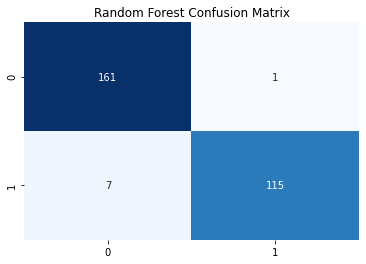

In [24]:
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(Y_test, predictions_RFC),annot=True,cmap="Blues",fmt="g",cbar=False)
plt.savefig('attacker_created_compromised_classifier_confusion_matrix_gt2.png')
plt.show()

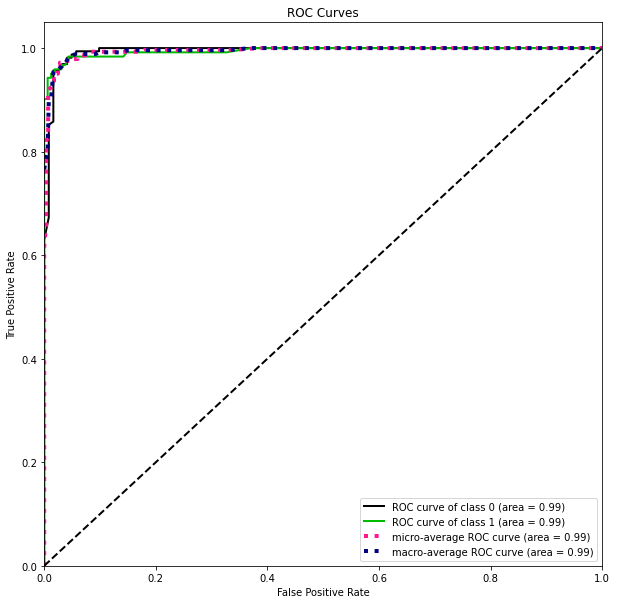

In [25]:
false_positive_rate_RFC, true_positive_rate_RFC, thresholds_RFC = roc_curve(Y_test,RFC.predict_proba(X_test)[:,1])
skplt.metrics.plot_roc_curve(Y_test.values,RFC.predict_proba(X_test), figsize = (10,10))
plt.savefig('attacker_created_compromised_classifier_roc_gt2.png')
plt.show()

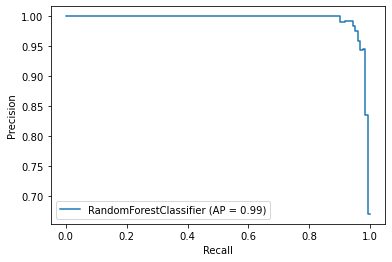

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(RFC, X_test, Y_test)
plt.savefig('attacker_created_compromised_classifier_precision_recall_curve_gt2.png')

Feature ranking:
1. feature 0 - days count-pdns (0.18636644644011677)
2. feature 17 - apex_marked_malicious (0.12921477314125338)
3. feature 15 - Number_of_total_Scans (0.10817698192062487)
4. feature 10 - brand (0.09192663098082132)
5. feature 18 - domain_marked_malicious (0.09003865304497251)
6. feature 26 - number of days between firstseen and lastseen (0.0775412522261834)
7. feature 27 - Alexa rank (avg) (0.07104650072701577)
8. feature 12 - similar (0.05356731650075656)
9. feature 24 - rlength (0.021497968132358918)
10. feature 25 - url_length (0.019030465927416616)
11. feature 4 - soa_domains_nos (0.01897324644408106)
12. feature 8 - entropy (0.017757000325432676)
13. feature 7 - length (0.016142407956111)
14. feature 21 - Positive_count (0.015795675223394107)
15. feature 6 - suspicious_tld (0.015205373923193129)
16. feature 1 - query count (0.010922572430566213)
17. feature 22 - Response_code (0.009298715098807152)
18. feature 14 - num_subdomains (0.00924203144365051)
19. featur

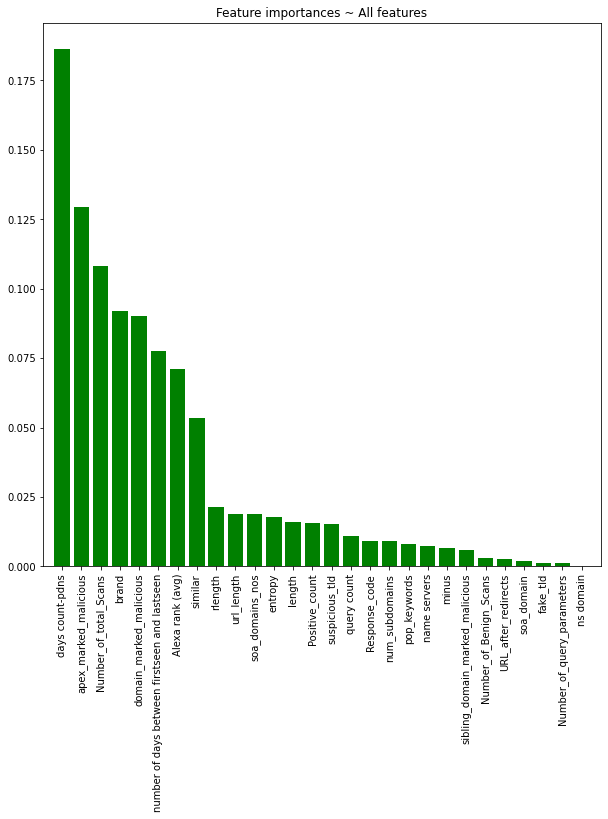

In [27]:
import numpy as np
importances = RFC.feature_importances_
std = np.std([RFC.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
Feature = ['days count-pdns', 'query count', 'name servers', 'ns domain',
       'soa_domains_nos', 'soa_domain', 'suspicious_tld', 'length', 'entropy',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'minus',
       'num_subdomains', 'Number_of_total_Scans',
       'Number_of_Benign_Scans', 'apex_marked_malicious',
       'domain_marked_malicious', 'sibling_domain_marked_malicious',
       'Number_of_query_parameters', 'Positive_count', 'Response_code',
       'URL_after_redirects', 'rlength', 'url_length',
       'number of days between firstseen and lastseen','Alexa rank (avg)']
for f in range(X_train.shape[1]):
    print("{}. feature {} - {} ({})" .format(f + 1, indices[f], Feature[indices[f]], importances[indices[f]]))
indiceX = [Feature[i] for i in indices]
plt.figure(figsize=(10,10))
plt.title("Feature importances ~ All features")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indiceX, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.savefig('attacker_created_compromised_classifier_feature_importances_gt2.png')
plt.show()

In [28]:
import pickle
pickle.dump(RFC,open('attack_created_compromised_classifier_rf_gt_2.pickle','wb'))